In [2]:
!pip install netCDF4

     |████████████████████████████████| 4.7 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 325 kB 86.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/chainer_p36/bin/python -m pip install --upgrade pip' command.


In [3]:
import netCDF4

In [4]:
!pip install xarray

     |████████████████████████████████| 736 kB 6.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/chainer_p36/bin/python -m pip install --upgrade pip' command.


In [5]:
INPUT_FILE = 'super_resolution_sample.nc'

In [6]:
import xarray as xa
sample_x = xa.open_dataset(INPUT_FILE, group='/train/x')

In [8]:
test_x = xa.open_dataset(INPUT_FILE, group='/train/y')

In [9]:
#Importing All major The Necessary Packages
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
from sklearn.decomposition import PCA
import  matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler 

In [10]:
df = sample_x.to_dataframe()
dff = test_x.to_dataframe()

In [17]:
df = pd.concat([df,dff], axis=1)

In [18]:
df

mg_delta    me_delta  zp_delta      vg_delta  \
time                x   y                                                       
2016-10-01 00:00:00 0   0    5.995204e-14  -73.769531  1.595800 -3.000000e+00   
                        1    5.995204e-14  -22.457031  1.529394  2.398082e-12   
                        2    5.995204e-14    1.855469  1.509130  2.398082e-12   
                        3    5.995204e-14  -71.894531  1.880713  2.398082e-12   
                        4    5.995204e-14 -104.457031  1.938818  2.398082e-12   
...                                   ...         ...       ...           ...   
2016-10-03 09:00:00 255 251 -1.940308e-01   15.730469 -3.083399  2.398082e-12   
                        252 -1.106873e-01   22.105469 -2.199854  2.398082e-12   
                        253 -1.940308e-01   21.230469 -3.067530  2.398082e-12   
                        254 -1.940308e-01   10.980469 -3.167627  2.398082e-12   
                        255 -2.453613e-02   -4.957031  0.117285  2.398082e-12   

                                   td   train_tt           pn        nt  \
time                x   y                                                 
2016-10-01 00:00:00 0   0    1.877701  10.292023  1009.307739  0.105957   
                        1    1.877701  10.292023  1009.307739  0.105957   
                        2    1.877701  10.292023  1009.307739  0.105957   
                        3   -0.153549  12.098663  1009.385864  0.371582   
                        4   -0.153549  12.098663  1009.385864  0.371582   
...                               ...        ...          ...       ...   
2016-10-03 09:00:00 255 251  2.094345   3.891663  1014.628174  0.576660   
                        252  2.094345   3.891663  1014.628174  0.576660   
                        253  2.094345   3.891663  1014.628174  0.576660   
                        254  2.094345   3.891663  1014.628174  0.576660   
                        255  2.594345   3.926819  1014.690674  0.980957   

                                       h            rt   i4   5p        i6  \
time                x   y                                                    
2016-10-01 00:00:00 0   0    1500.394775  8.195639e-08  0.0  0.0  0.800054   
                        1    1500.394775  8.195639e-08  0.0  0.0  0.800054   
                        2    1500.394775  8.195639e-08  0.0  0.0  0.800054   
                        3    1500.394775  0.000000e+00  0.0  0.0  0.800054   
                        4    1500.394775  0.000000e+00  0.0  0.0  0.800054   
...                                  ...           ...  ...  ...       ...   
2016-10-03 09:00:00 255 251    88.975586  0.000000e+00  0.0  0.0  0.800054   
                        252    88.975586  0.000000e+00  0.0  0.0  0.800054   
                        253    88.975586  0.000000e+00  0.0  0.0  0.800054   
                        254    88.975586  0.000000e+00  0.0  0.0  0.800054   
                        255    82.975586  3.725290e-08  0.0  0.0  0.800054   

                                   uu        vv         tt  
time                x   y                                   
2016-10-01 00:00:00 0   0    1.102224  1.666101   9.934269  
                        1    1.102224  1.666101  10.239933  
                        2    1.102224  1.666101  10.230167  
                        3   -0.372873  1.744226  10.028996  
                        4   -0.372873  1.744226  10.330753  
...                               ...       ...        ...  
2016-10-03 09:00:00 255 251 -2.752129 -1.740095   3.521473  
                        252 -2.752129 -1.740095   2.978504  
                        253 -2.752129 -1.740095   3.301746  
                        254 -2.752129 -1.740095   3.354481  
                        255 -1.518730 -1.496686   4.025379  

[1310720 rows x 16 columns]

In [15]:
df=df.rename({'tt':'train_tt'}, axis='columns')

In [19]:
sdf = StandardScaler().fit_transform(df)
ssdf=pd.DataFrame(sdf,columns=df.columns)
y = ssdf['tt']
X = ssdf.drop(columns=['tt'])

In [20]:
!pip install keras

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/chainer_p36/bin/python -m pip install --upgrade pip' command.


In [21]:
!pip install tensorflow

     |████████████████████████████████| 394.3 MB 10 kB/s s eta 0:00:01     |███████████████▌                | 190.9 MB 27.7 MB/s eta 0:00:08███████████████           | 258.8 MB 39.7 MB/s eta 0:00:04
     |████████████████████████████████| 127 kB 22.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.7 MB/s  eta 0:00:01
     |████████████████████████████████| 65 kB 520 kB/s  eta 0:00:01
     |████████████████████████████████| 10.6 MB 23.3 MB/s eta 0:00:01
     |████████████████████████████████| 114 kB 39.5 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 9.3 MB/s  eta 0:00:01
     |████████████████████████████████| 155 kB 30.4 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 31.1 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 29.1 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 39.4 MB/s eta 0:00:01
  Created wheel for termcolor: filename=term

In [22]:
import numpy as np
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#cleaning test data
df1 = df.replace([np.inf, -np.inf], np.nan)
df1 = df1.dropna()
df1
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df1.values)
df_scaled

array([[0.40298843, 0.46799153, 0.3645045 , ..., 0.55384076, 0.54923   ,
        0.6058321 ],
       [0.40298843, 0.5009535 , 0.35969442, ..., 0.55384076, 0.54923   ,
        0.6135974 ],
       [0.40298843, 0.5165713 , 0.35822666, ..., 0.55384076, 0.54923   ,
        0.6133493 ],
       ...,
       [0.2726695 , 0.5290173 , 0.02672067, ..., 0.44574922, 0.4212182 ,
        0.43733573],
       [0.2726695 , 0.522433  , 0.01947019, ..., 0.44574922, 0.4212182 ,
        0.43867543],
       [0.38650897, 0.5121951 , 0.25740963, ..., 0.4803387 , 0.43036595,
        0.45571932]], dtype=float32)

In [23]:
# having the dataset as x and y . Making x into a 3-d data and y as 2-d data ie.) reshaping
X_train = []
y_train = []
n_output_steps = 1  # Number of outputs we want to predict into the future
n_input_steps = 1   # Number of past inputs that we want to use to predict the future
for i in range(n_input_steps, len(df_scaled) - n_output_steps +1):
    X_train.append(df_scaled[i - n_input_steps:i, 0:df.shape[1] - 1])
    y_train.append(df_scaled[i + n_output_steps - 1:i + n_output_steps, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print('X_train shape == {}.'.format(X_train.shape))   # no.of samples, no. of time stamps, no. of features
print('y_train shape == {}.'.format(y_train.shape))   # no. of features, no. of output time steps

X_train shape == (1310719, 1, 15).
y_train shape == (1310719, 1).


In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mg_delta,1310720.0,8.190377e-05,5.237102e-02,-0.600006,5.995204e-14,5.995204e-14,5.995204e-14,0.888885
me_delta,1310720.0,-3.293303e-01,1.606373e+02,-802.300781,-5.605078e+01,6.054688e-01,4.573828e+01,754.417969
zp_delta,1310720.0,9.911274e-01,1.896571e+00,-3.436426,-1.747074e-01,9.703121e-01,2.205969e+00,10.369238
vg_delta,1310720.0,-2.400970e-01,6.023849e+00,-24.000000,2.398082e-12,2.398082e-12,2.398082e-12,23.000000
td,1310720.0,2.213414e+00,4.322602e+00,-16.530655,-6.446228e-01,2.276978e+00,5.283249e+00,15.315201
train_tt,1310720.0,4.985594e+00,4.642217e+00,-13.840759,1.889038e+00,4.760803e+00,8.070129e+00,24.987335
pn,1310720.0,1.021847e+03,7.959141e+00,1005.616333,1.012298e+03,1.014240e+03,1.016953e+03,1023.601685
nt,1310720.0,5.036243e-01,4.228306e-01,0.000000,0.000000e+00,5.346680e-01,9.658203e-01,1.000000
h,1310720.0,1.012061e+03,5.427440e+02,54.975586,4.546646e+02,1.276395e+03,1.499817e+03,2250.394775
rt,1310720.0,6.862428e-08,2.120975e-07,0.000000,0.000000e+00,0.000000e+00,2.235174e-08,0.000005


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
#Variables
x=df.drop(columns=['tt'])
y=pd.DataFrame(df['tt'],columns=['tt'])
y=np.reshape(y, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [27]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [28]:
from keras import models, layers

model = Sequential()
model.add(Dense(100, input_dim=15, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(75, activation='tanh'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, kernel_initializer='uniform', activation='tanh'))
# output layer
model.add(layers.Dense(1))

In [29]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [30]:
history = model.fit(X_train, y_train, epochs=100, batch_size=160,  verbose=1, validation_split=0.2)

Epoch 1/100
4916/4916 [==============================] - 9s 2ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0483 - val_loss: 0.0016 - val_mse: 0.0016 - val_mae: 0.0300
Epoch 2/100
4916/4916 [==============================] - 8s 2ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0295 - val_loss: 0.0016 - val_mse: 0.0016 - val_mae: 0.0305
Epoch 3/100
4916/4916 [==============================] - 8s 2ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0277 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0276
Epoch 4/100
4916/4916 [==============================] - 8s 2ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0265 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0257
Epoch 5/100
4916/4916 [==============================] - 8s 2ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0254 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0265
Epoch 6/100
4916/4916 [==============================] - 8s 2ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0246 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.024

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


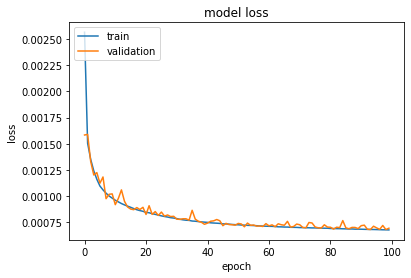

In [31]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


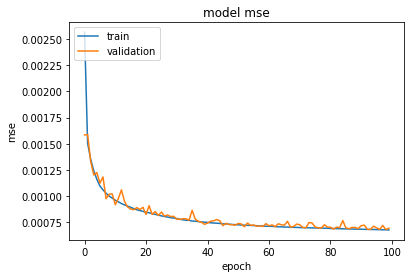

In [32]:
print(history.history.keys())
# "MSE"
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


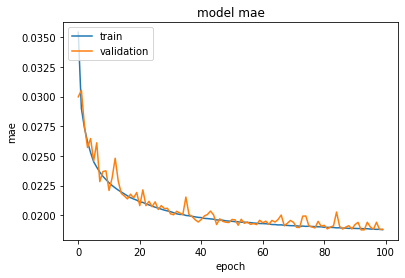

In [33]:
print(history.history.keys())
# "MAE"
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [34]:
model.evaluate(X_test, y_test)

10240/10240 [==============================] - 10s 958us/step - loss: 6.9614e-04 - mse: 6.9614e-04 - mae: 0.0189


[0.000696140865329653, 0.000696140865329653, 0.018852591514587402]

In [35]:
!pip install eli5

     |████████████████████████████████| 106 kB 6.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/chainer_p36/bin/python -m pip install --upgrade pip' command.


In [36]:
!pip install shap

     |████████████████████████████████| 352 kB 6.2 MB/s eta 0:00:01
  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=480261 sha256=1b040304f2ebb624af9b8e2dc12534299c9d91548f218a0c6e462c1a369093aa
  Stored in directory: /home/ec2-user/.cache/pip/wheels/4d/b0/77/f9332e31f6af68b2e00450e9033ab768fe8765f1924d01d644
Successfully built shap
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/chainer_p36/bin/python -m pip install --upgrade pip' command.


In [37]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

/home/ec2-user/anaconda3/envs/chainer_p36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [44]:
def base_model():
    model = Sequential()
    model.add(Dense(100, input_dim=14, activation='relu'))
    model.add(Dense(75, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='relu'))
    # output layer
    model.add(layers.Dense(1))   

In [35]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [36]:
for depth in range (1,10):
    tree_regressor=tree.DecisionTreeRegressor(max_depth=depth,random_state=1)
    if tree_regressor.fit(X,y).tree_.max_depth<depth:
        break
    score=np.mean(cross_val_score(tree_regressor,X,y,scoring='neg_mean_squared_error', cv=10,n_jobs=1))
    print(depth, score)

1 -9.780439412970836
2 -5.963767675701363
3 -4.774158928268536
4 -4.442155006197374
5 -4.094581830923138
6 -3.7695465469683826
7 -3.7735580122522108
8 -3.776314958861915
9 -3.7690939010429303


In [45]:
param_model = KerasRegressor(build_fn=base_model, epochs=150, batch_size=16, verbose=0)    
param_model.fit(X_test,y_test)

AttributeError: 'NoneType' object has no attribute 'loss'

In [38]:
param_model.model.save('saved_param_model.h5')

NameError: name 'param_model' is not defined

In [ ]:
tas=sample_x.tt
for i in range(5):
    tas[i,:,:].plot(figsize=(6,4))
    plt.show()
    plt.close()

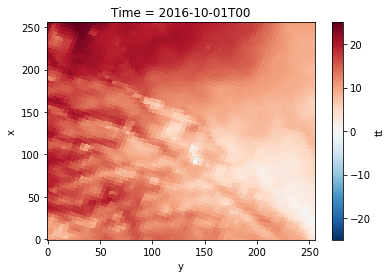

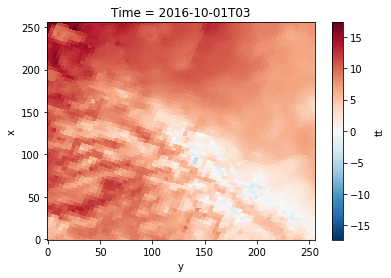

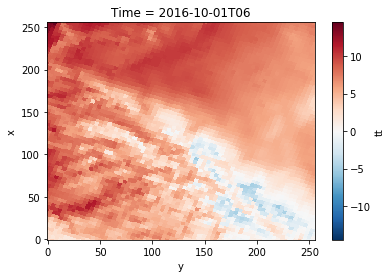

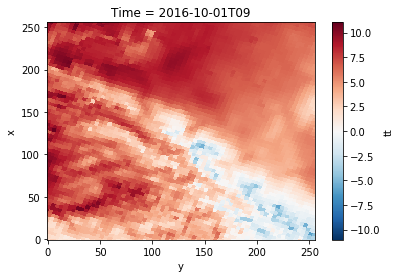

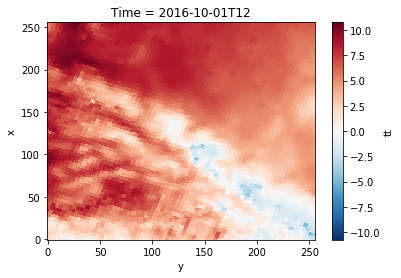

In [49]:
for i in range(5):
    tas[i,:,:].plot(figsize=(6,4))
    plt.title("Time = " + str(tas.coords['time'].values[i])[:13])
    plt.show()
    plt.close()

FileNotFoundError: [Errno 2] No such file or directory: '../Untitled Folder/Python_Animation_01_frame_0000.png'

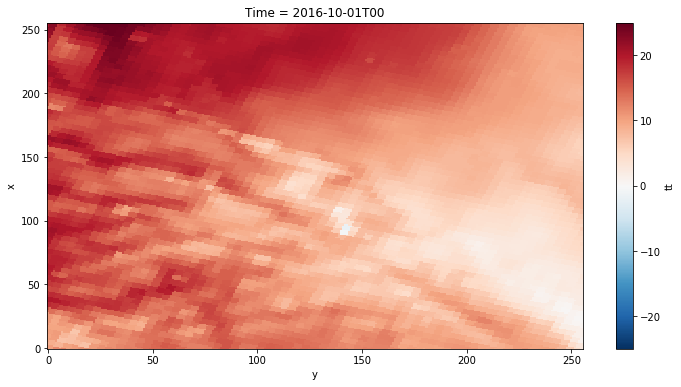

In [53]:
for i in range(20):
    tas[i,:,:].plot(
        figsize = (12,6)      # We'll make it a bit bigger
    )
    plt.title("Time = " + str(tas.coords['time'].values[i])[:13])
    plt.savefig(f"../Untitled Folder/Python_Animation_01_frame_{i:04}.png")
    plt.close()

In [55]:
from IPython.display import HTML, display

!convert Python_Animation_01_frame*png Python_Animation_01.gif
display(HTML("<img src='Python_Animation_01.gif' />"))

/bin/sh: convert: command not found


In [56]:
for i in range(20):
    tas[i,:,:].plot(
        figsize = (12,6),
        vmin=-40, vmax=40  # Minimum and Maximum values
    )
    plt.title("Time = " + str(tas.coords['time'].values[i])[:13])
    plt.savefig(f"Python_Animation_02_frame_{i:04}.png")
    plt.close()

In [57]:
!convert Python_Animation_02_frame*.png Python_Animation_02.gif
display(HTML("<img src='Python_Animation_02.gif' />"))

/bin/sh: convert: command not found


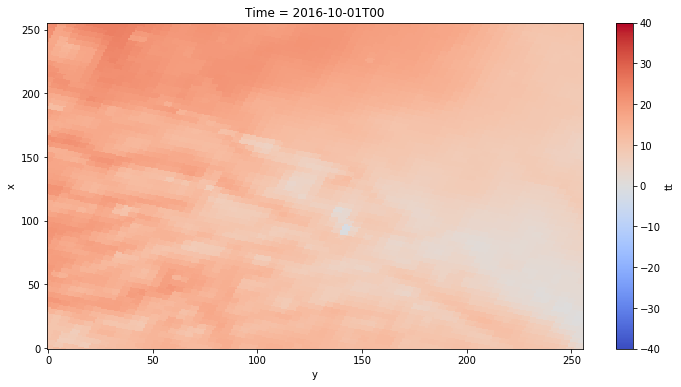

In [61]:
# Get a handle on the figure and the axes
fig, ax = plt.subplots(figsize=(12,6))
from matplotlib import pyplot as plt, animation

# Plot the initial frame. 
cax = tas[0,:,:].plot(
    add_colorbar=True,
    cmap='coolwarm',
    vmin=-40, vmax=40,
    cbar_kwargs={
        'extend':'neither'
    }
)

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    cax.set_array(tas[frame,:,:].values.flatten())
    ax.set_title("Time = " + str(tas.coords['time'].values[frame])[:13])

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=20,       # Could also be iterable or list
    interval=200     # ms between frames
)

In [ ]:
HTML(ani.to_jshtml())

In [37]:
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression
X, y = make_regression(n_features=15, random_state=0)
regr16 = ElasticNetCV(cv=10, random_state=0)
regr16.fit(X_train, y_train)

/home/ec2-user/anaconda3/envs/chainer_p36/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto', random_state=0,
             selection='cyclic', tol=0.0001, verbose=0)

In [38]:
regr16.fit(X_test, y_test)  
regr16.score(X_test,y_test)

/home/ec2-user/anaconda3/envs/chainer_p36/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8449874104691709

In [40]:
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression
X, y = make_regression(
    n_samples=200, n_features=2, noise=4.0, random_state=0)
reg20 = RANSACRegressor(random_state=0).fit(X, y)
reg20.score(X, y) 

reg20.predict(X[:1,])


array([-31.94170869])

In [41]:
reg20.fit(X_test, y_test)  
reg20.score(X_test,y_test)

0.8168837211953368

In [42]:
import numpy as np
from sklearn import linear_model
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)


/home/ec2-user/anaconda3/envs/chainer_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [43]:
clf.fit(X_test, y_test)  
clf.score(X_test,y_test)

/home/ec2-user/anaconda3/envs/chainer_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.839378145914544

In [44]:
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.datasets import make_regression
X, y = make_regression(noise=10, random_state=5)
rego1 = OrthogonalMatchingPursuit().fit(X_train, y_train)
rego1.score(X_train, y_train) 

0.8081635720267223

In [45]:
rego1.fit(X_test, y_test)  
rego1.score(X_test,y_test)

0.8081147408891949

In [46]:
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.datasets import make_regression
X, y = make_regression(noise=4, random_state=0)
rego = OrthogonalMatchingPursuit().fit(X_train, y_train)
rego.score(X_train, y_train) 


0.8081635720267223

In [47]:
rego.fit(X_test, y_test)  
rego.score(X_test,y_test)

0.8081147408891949

In [49]:
from sklearn.linear_model import PassiveAggressiveRegressor
regrpar1 = PassiveAggressiveRegressor(max_iter=100, random_state=0,
tol=1e-3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=40)
regrpar1.fit(X_train, y_train)  
print(regrpar1.coef_)

print(regrpar1.intercept_)

[-1.29722163  1.62176266  2.59151398 -6.64625442  4.99746513  4.07298107
  5.83475824  0.41662829 -0.63519748  1.0650601  -4.01442553  4.75803779
  4.59407789  7.22781395 -0.86340494 -0.21246393  1.11348781  5.11140003
 -5.69021179 -0.83086594 -0.83435803 -3.86843669 -1.10024744  1.05351939
  3.74987724  5.93164832  3.84247156 -4.17667069 -1.4413155   0.57486175
  1.95517946  2.82759483  0.12950968  7.61193441  2.33154047  1.11293604
 -0.71191473 -7.20349328  3.70810437 -1.24710617  7.67420326 -0.69446798
 -4.14031044  1.04626572  3.54422424 -1.36454566 -2.3848534   2.72941848
  6.15424139 -3.8539393  -2.86865314 -0.94218735 -0.90918272 -0.70210246
 -4.57381343 -3.63688103  3.04402377 -0.81078839  1.37222403 -5.81323664
  3.82156321 -1.66859913  8.0355897  -0.75396353  1.84891516 -1.69377767
  0.36210831  2.23068965  1.62850288  6.27420474  0.60620114 -5.43795884
  2.42846185  4.9570696   4.03435092 -6.78743404 -0.48072466  5.81055447
  2.659007    9.48280266  3.37861413 -9.31986164  0

In [50]:
regrpar1.score(X_test,y_test)

0.11643569475058235

In [52]:
!pip install xgboost

  Using cached xgboost-1.3.3-py3-none-manylinux2010_x86_64.whl (157.5 MB)
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/chainer_p36/bin/python -m pip install --upgrade pip' command.


In [55]:
#Code for demographic dataset II(Predicting Mean Debt)
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
y = df['tt']
X = df.drop(columns=['tt'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.5,
                max_depth = 10, alpha = 10, n_estimators = 15)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

[21:48:57] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 1.264600


In [56]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1.264600


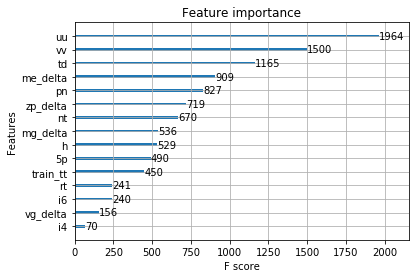

In [57]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xg_reg)
pyplot.show(50,40)

In [58]:
#Performing Randomized Search
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

NameError: name 'rfc' is not defined

In [61]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# Convert X back to a Pandas DataFrame, for convenience
X = pd.DataFrame(rescaledX, index=X.index, columns=X.columns)
test_size = 0.30
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
models = [LinearRegression(), SVR(), BaggingRegressor(), GradientBoostingRegressor(), RandomForestRegressor(), DecisionTreeRegressor(), KNeighborsRegressor(), Lasso(), Ridge()]

In [ ]:
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    print(type(model).__name__, mean_absolute_error(y_train, predictions))

LinearRegression 1.3466176
